# Set up enviroment

In [ ]:
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Start

In [ ]:
from sklearn.linear_model import LinearRegression

def buildModel():
  model = LinearRegression()
  return model

## Reading dataset

In [ ]:
dataset_path = '/content/drive/MyDrive/UIT/IS403/Source_Code_PTDLKD/Data Train 1-3-2019 1-3-2024/Vietcombank.csv'
df = pd.read_csv(dataset_path, index_col="Date")


In [ ]:
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
3/1/2019,40478.95313,41275.25781,40346.23438,41275.25781,41275.25781,1225908
3/4/2019,41275.25781,41806.13281,41275.25781,41673.41406,41673.41406,2030592
3/5/2019,41673.41406,42337.00391,41474.33594,41806.13281,41806.13281,2376092
3/6/2019,41872.48828,42005.20703,41076.18359,41607.05469,41607.05469,2107101
3/7/2019,41607.05469,42337.00391,41540.69531,41872.48828,41872.48828,3091640
3/8/2019,41407.97656,41806.13281,41208.90234,41673.41406,41673.41406,1502992
3/11/2019,41407.97656,41607.05469,41076.18359,41540.69531,41540.69531,2149189
3/12/2019,41806.13281,43000.59375,41607.05469,43000.59375,43000.59375,3397250
3/13/2019,43133.30859,43266.02734,42801.51563,43266.02734,43266.02734,2682908


In [ ]:
print(f"Data shape: {df.shape}")

Data shape: (1245, 6)


## Data preprocessing

### Checking duplicates and null values

In [ ]:
print("Duplicated")
df.duplicated().sum()

Duplicated


0

In [ ]:
print("Null")
df.isnull().sum()

Null


Open         0
High         0
Low          0
Close        0
Adj Close    0
Volume       0
dtype: int64

### Checking DataFrame information

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1245 entries, 3/1/2019 to 3/1/2024
Data columns (total 6 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Open       1245 non-null   float64
 1   High       1245 non-null   float64
 2   Low        1245 non-null   float64
 3   Close      1245 non-null   float64
 4   Adj Close  1245 non-null   float64
 5   Volume     1245 non-null   int64  
dtypes: float64(5), int64(1)
memory usage: 68.1+ KB


### Overview Data Descriptive statistic

In [ ]:
df.describe()

,Open,High,Low,Close,Adj Close,Volume
count,1245.000000,1245.000000,1245.000000,1245.000000,1245.000000,1.245000e+03
mean,65326.640673,66075.816947,64590.724480,65386.555605,65386.555605,1.759896e+06
std,12598.819653,12674.750060,12475.907276,12601.057166,12601.057166,1.451529e+06
min,37957.312500,38753.621090,37559.160160,37957.312500,37957.312500,3.044610e+05
25%,56405.097660,56935.968750,55874.226560,56405.097660,56405.097660,1.053452e+06
50%,64899.042970,65562.632810,64235.453130,64775.613280,64775.613280,1.464353e+06
75%,72311.601560,73525.703130,71464.859380,72396.273440,72396.273440,2.107101e+06
max,98500.000000,100500.000000,97300.000000,97400.000000,97400.000000,3.407681e+07


## Linear Regression Model

### Split Data

In [ ]:
df.reset_index(inplace=True)

features = df.index
target = df['Close']

def splitTrainTest(test_ratio):
    n_observations = len(df)

    train_size = int((1-test_ratio) * n_observations)
    test_size = n_observations - train_size

    x_train, x_test = (
        np.array(features[:train_size]).reshape(-1, 1),
        np.array(features[train_size:train_size + test_size]).reshape(-1, 1)
    )
    y_train, y_test = target[:train_size], target[train_size:train_size + test_size]

    return x_train, x_test, y_train, y_test

In [ ]:
def makePlots(data):
    (test_ratio, x_train, y_train, x_test, y_test, y_pred, x_next_30_days, y_next_30_days) = data

    figname = f'VCB__{int(10-test_ratio*10)}-{int(test_ratio*10)}'
    plt.title(figname)
    plt.xlabel('Index')
    plt.ylabel('Price')

    # train
    plt.plot(x_train, y_train)

    # test
    plt.plot(x_test, y_test)
    plt.plot(x_test, y_pred)

    # next 30 days
    plt.plot(x_next_30_days, y_next_30_days)

    # save plots and show
    plt.legend(['Train', 'Test', 'Predictions (Test)','Predictions (Next30Days)'])
    # plt.savefig("plots/%s.png" % figname,bbox_inches='tight')
    plt.show()

In [ ]:
def evaluateAccuracy(y_test, y_pred):
    test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
    print('Testing RMSE:', test_rmse)

    test_mape = np.mean(np.abs(y_pred - y_test)/np.abs(y_test))
    print('Testing MAPE:', test_mape)

    test_mae = np.mean(abs(y_pred - y_test))
    print('Testing MAE:', test_mae)

In [ ]:
# train:test 9:1 8:2 7:3
test_ratio = 0.3

print("==============================")
print('Test Ratio: ', test_ratio)

#====Start-Linear-Regression-model====#
# split train test by test_ratio
x_train, x_test, y_train, y_test= splitTrainTest(test_ratio)

print("Train: ", x_train.shape)
print("Test: ", x_test.shape)

# create linear regression model
model = buildModel()
model.fit(x_train, y_train)

# make prediction
y_pred = model.predict(x_test)

# compare actual and predicted price
comparison_data = {'Actual_Price':y_test, 'Predicted_Price':y_pred}
comparison_table = pd.DataFrame(comparison_data)
print(comparison_table)

# evaluate accuracy
evaluateAccuracy(y_test, y_pred)
#====End-Linear-Regression-model====#



#====Start-Predick-next-30-days====#
print("==============================")
last_index =  df.index[-1]
x_next_30_days = np.array(range(last_index+1, last_index+31)).reshape(-1, 1)
y_next_30_days = model.predict(x_next_30_days)
print("Next 30 Days:")
print(y_next_30_days)
#====End-Predick-next-30-days====#

Test Ratio:  0.3
Train:  (871, 1)
Test:  (374, 1)
      Actual_Price  Predicted_Price
871    67739.20313     71885.302903
872    67908.55469     71913.436725
873    69432.68750     71941.570546
874    69432.68750     71969.704368
875    69856.05469     71997.838189
...            ...              ...
1240   89500.00000     82266.683068
1241   91100.00000     82294.816890
1242   97400.00000     82322.950711
1243   97300.00000     82351.084533
1244   97300.00000     82379.218355

[374 rows x 2 columns]
Testing RMSE: 7643.426532477112
Testing MAPE: 0.08504933406283578
Testing MAE: 6473.297283355789
Next 30 Days:
[82407.35217625 82435.48599784 82463.61981942 82491.75364101
 82519.8874626  82548.02128418 82576.15510577 82604.28892735
 82632.42274894 82660.55657053 82688.69039211 82716.8242137
 82744.95803529 82773.09185687 82801.22567846 82829.35950005
 82857.49332163 82885.62714322 82913.7609648  82941.89478639
 82970.02860798 82998.16242956 83026.29625115 83054.43007274
 83082.56389432 83

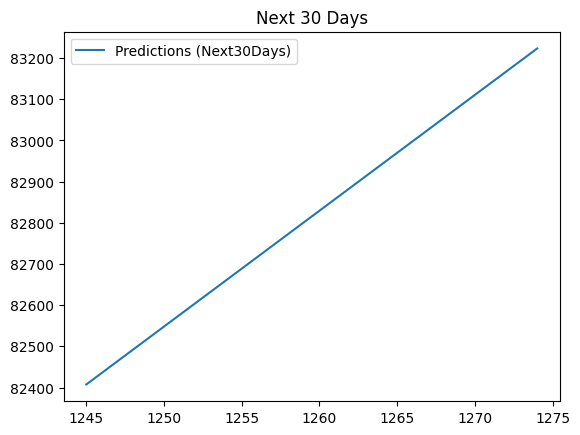

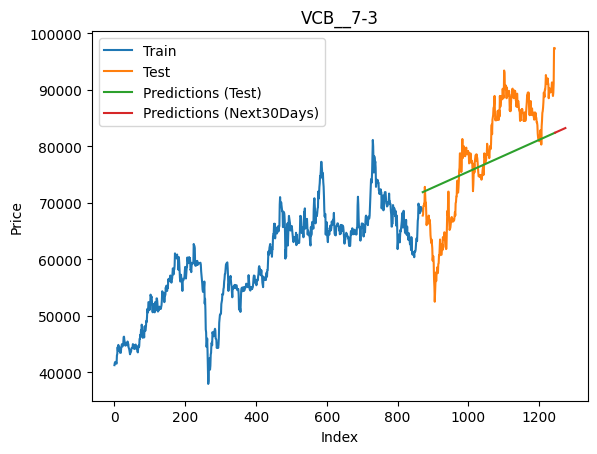

In [ ]:
# use plots to display data
# next 30 days
plt.title("Next 30 Days")
plt.plot(x_next_30_days, y_next_30_days)
plt.legend(['Predictions (Next30Days)'])
plt.show()
# all
makePlots((test_ratio, x_train , y_train, x_test, y_test, y_pred, x_next_30_days, y_next_30_days))